<a href="https://colab.research.google.com/github/anjanapjayapal/Machine-Learning/blob/main/Regression/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/datasets/economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
# drop unnecessary column

df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
# Check null values

df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


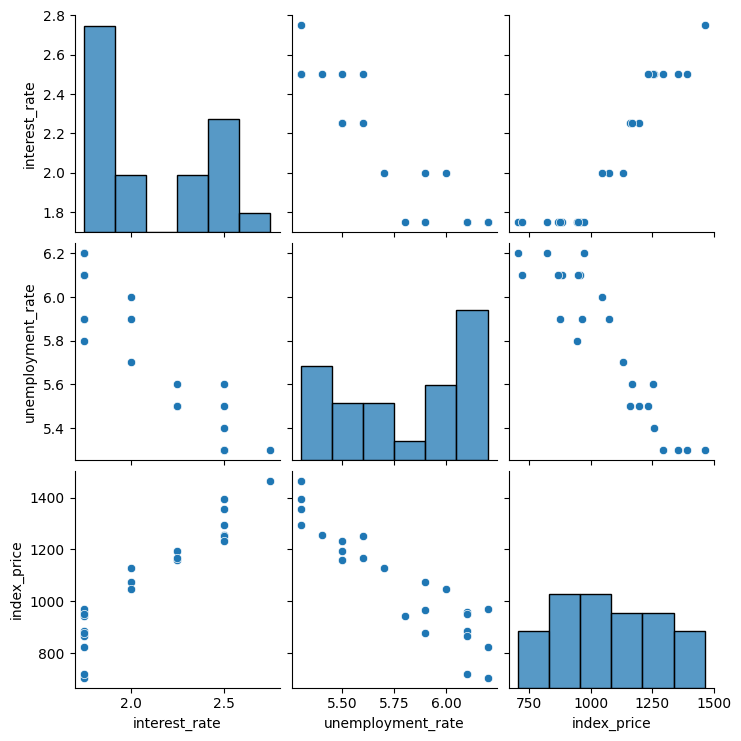

In [6]:
## Visualizations

import seaborn as sns
sns.pairplot(df)

In [7]:
# Correlation

df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

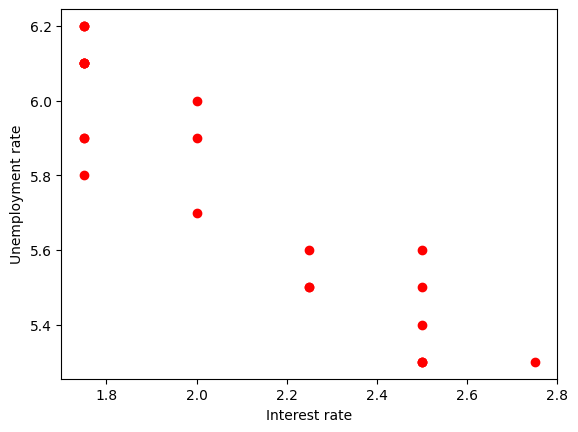

In [8]:
# Visualize the datapoints

plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [9]:
# Independent and Dependent Features

#X=df[['interest_rate','unemployment_rate']]
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [10]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [12]:
# Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

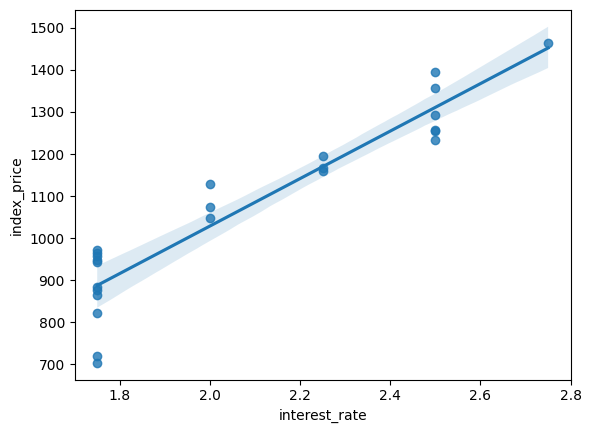

In [13]:
import seaborn as sns

sns.regplot(data=df, x='interest_rate', y='index_price')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

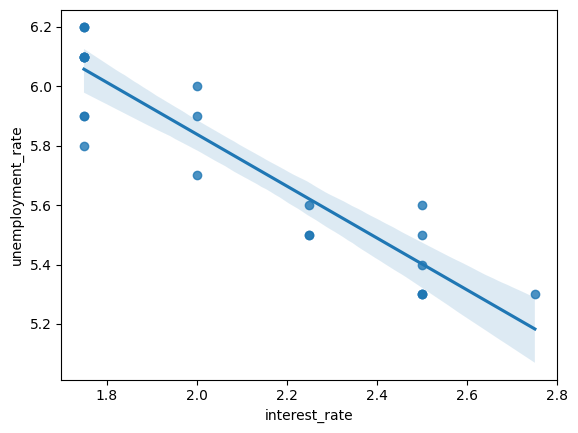

In [14]:
sns.regplot(data=df, x='interest_rate', y='unemployment_rate')

In [15]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [18]:
from sklearn.model_selection import cross_val_score

val_score=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
val_score

array([-1861.74046551, -8715.8459466 , -7707.52362191, -9169.13776461,
        -791.32842311])

In [19]:
np.mean(val_score)

-5649.115244350758

In [20]:
# Prediction

y_pred=model.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [21]:
# Performance Matrices

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
adj_r2=1-(1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)
print("R2 Score: ",r2)
print("Adjusted R2 Score: ",adj_r2)

Mean Squared Error:  5793.762887712569
Mean Absolute Error:  59.935781523235484
Root Mean Squared Error:  76.11677139574805
R2 Score:  0.8278978091457145
Adjusted R2 Score:  0.8049508503651431


Assumptions

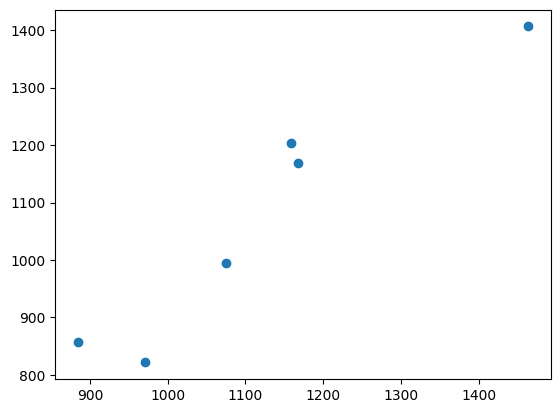

In [22]:
plt.scatter(y_test,y_pred)

# if it's follows linear relation model is good

In [24]:
residuals=y_test-y_pred
residuals

,index_price
8,-45.227704
16,149.349481
0,57.486996
18,26.291104
11,80.090077
9,-1.169327


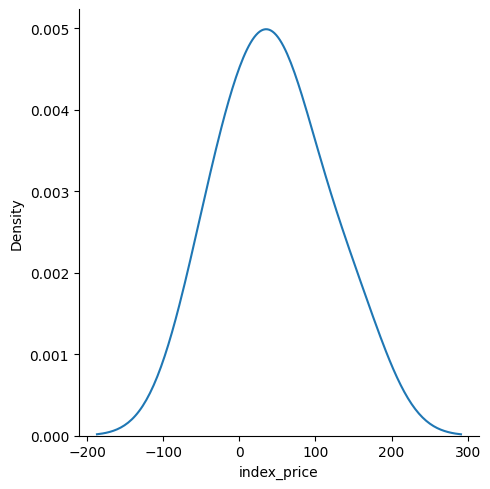

In [25]:
sns.displot(residuals,kind='kde')

# If it's normal it is good

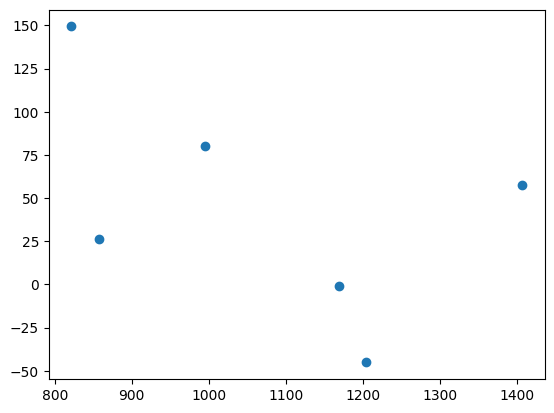

In [26]:
plt.scatter(y_pred,residuals)

In [29]:
# OLS Linear Regression

import statsmodels.api as sm
ols=sm.OLS(y_train,X_train).fit()
ols.summary()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 16 Nov 2024   Prob (F-statistic):                       0.754
Time:                        11:59:54   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print(model.coef_)
print(model.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443
